In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

In [2]:
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.callbacks import *
import keras
from keras import backend as K
import tensorflow as tf

D:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from rl.agents import *
from rl.policy import *
from rl.memory import *
from rl.random import *
import gym
from gym import Env, Space, spaces

In [4]:
env = gym.make('MountainCarContinuous-v0')
env.seed(123)
env.reset()
assert len(env.action_space.shape)==1
nb_actions = env.action_space.shape[0]
window_length = 1

In [16]:
model_x = Input((window_length, ) + env.observation_space.shape)
model_y = Flatten()(model_x)
model_y = Dense(16, activation='relu')(model_y)
model_y = Dense(16, activation='relu')(model_y)
model_y = Dense(16, activation='relu')(model_y)
model_y = Dense(nb_actions)(model_y)
actor = Model(model_x, model_y)

In [17]:
model_x1 = Input((nb_actions,))
model_x2 = Input((window_length,) + env.observation_space.shape)
model_y2 = Flatten()(model_x2)
model_y = Concatenate()([model_x1, model_y2])
model_y = Dense(32, activation='relu')(model_y)
model_y = Dense(32, activation='relu')(model_y)
model_y = Dense(32, activation='relu')(model_y)
model_y = Dense(1)(model_y)
critic = Model([model_x1, model_x2], model_y)

In [18]:
memory = SequentialMemory(limit=200000, window_length=window_length)
random_process = OrnsteinUhlenbeckProcess(size=nb_actions, theta=.15)
agent = DDPGAgent(nb_actions=nb_actions, actor=actor, critic=critic,
                 critic_action_input=model_x1, memory=memory,
                 nb_steps_warmup_critic=100, nb_steps_warmup_actor=100,
                 random_process=random_process)

In [19]:
agent.compile(Adam(), metrics=['mse'])

In [22]:
hist = agent.fit(env, nb_steps=100000, visualize=False, verbose=2, nb_max_episode_steps=200)
env.render()

Training for 100000 steps ...
   200/100000: episode: 1, duration: 1.665s, episode steps: 200, steps per second: 120, episode reward: -9.033, mean reward: -0.045 [-0.200, -0.000], mean action: -0.101 [-1.414, 0.831], mean observation: -0.281 [-1.200, 0.028], loss: 0.000002, mean_squared_error: 0.000004, mean_q: -0.032732
   400/100000: episode: 2, duration: 2.941s, episode steps: 200, steps per second: 68, episode reward: -6.479, mean reward: -0.032 [-0.122, -0.000], mean action: -0.510 [-1.105, 0.073], mean observation: -0.318 [-0.882, 0.019], loss: 0.000001, mean_squared_error: 0.000003, mean_q: -0.034772
   600/100000: episode: 3, duration: 3.024s, episode steps: 200, steps per second: 66, episode reward: -31.911, mean reward: -0.160 [-0.391, -0.000], mean action: 1.055 [-0.660, 1.977], mean observation: -0.114 [-0.645, 0.192], loss: 0.000012, mean_squared_error: 0.000025, mean_q: -0.038833
   800/100000: episode: 4, duration: 3.115s, episode steps: 200, steps per second: 64, episod

  5800/100000: episode: 29, duration: 3.529s, episode steps: 200, steps per second: 57, episode reward: -8.862, mean reward: -0.044 [-0.173, -0.000], mean action: -0.480 [-1.316, 0.449], mean observation: -0.326 [-1.200, 0.036], loss: 0.000006, mean_squared_error: 0.000012, mean_q: -0.064843
  6000/100000: episode: 30, duration: 3.644s, episode steps: 200, steps per second: 55, episode reward: -18.847, mean reward: -0.094 [-0.259, -0.002], mean action: -0.900 [-1.609, -0.146], mean observation: -0.350 [-0.832, 0.009], loss: 0.000004, mean_squared_error: 0.000008, mean_q: -0.064517
  6200/100000: episode: 31, duration: 3.536s, episode steps: 200, steps per second: 57, episode reward: -41.402, mean reward: -0.207 [-0.660, -0.000], mean action: 1.168 [-0.265, 2.569], mean observation: -0.186 [-0.626, 0.017], loss: 0.000007, mean_squared_error: 0.000014, mean_q: -0.065801
  6400/100000: episode: 32, duration: 3.537s, episode steps: 200, steps per second: 57, episode reward: -16.255, mean r

 11355/100000: episode: 57, duration: 3.686s, episode steps: 200, steps per second: 54, episode reward: -2.183, mean reward: -0.011 [-0.066, -0.000], mean action: 0.011 [-0.813, 0.777], mean observation: -0.255 [-0.842, 0.016], loss: 0.000105, mean_squared_error: 0.000211, mean_q: -0.007044
 11542/100000: episode: 58, duration: 3.338s, episode steps: 187, steps per second: 56, episode reward: 93.225, mean reward: 0.499 [-0.365, 99.580], mean action: 0.295 [-0.431, 2.049], mean observation: -0.212 [-0.809, 0.458], loss: 0.000038, mean_squared_error: 0.000077, mean_q: -0.005272
 11742/100000: episode: 59, duration: 3.548s, episode steps: 200, steps per second: 56, episode reward: -20.005, mean reward: -0.100 [-0.325, -0.000], mean action: 0.831 [-0.452, 1.802], mean observation: -0.183 [-0.684, 0.013], loss: 1.536561, mean_squared_error: 3.073121, mean_q: 0.003040
 11942/100000: episode: 60, duration: 3.535s, episode steps: 200, steps per second: 57, episode reward: -1067.672, mean rewar

 16855/100000: episode: 85, duration: 3.571s, episode steps: 200, steps per second: 56, episode reward: -35.930, mean reward: -0.180 [-0.347, -0.000], mean action: 1.272 [-0.038, 1.863], mean observation: -0.155 [-0.528, 0.017], loss: 0.022885, mean_squared_error: 0.045770, mean_q: -0.120711
 16991/100000: episode: 86, duration: 2.411s, episode steps: 136, steps per second: 56, episode reward: 76.169, mean reward: 0.560 [-1.051, 98.985], mean action: 0.388 [-1.453, 3.241], mean observation: -0.200 [-0.838, 0.467], loss: 0.840005, mean_squared_error: 1.680011, mean_q: -0.132967
 17191/100000: episode: 87, duration: 3.509s, episode steps: 200, steps per second: 57, episode reward: -3.355, mean reward: -0.017 [-0.179, -0.000], mean action: -0.102 [-1.339, 0.673], mean observation: -0.268 [-0.830, 0.019], loss: 0.584889, mean_squared_error: 1.169778, mean_q: -0.115593
 17391/100000: episode: 88, duration: 3.470s, episode steps: 200, steps per second: 58, episode reward: -8.922, mean reward

 22391/100000: episode: 113, duration: 3.507s, episode steps: 200, steps per second: 57, episode reward: -25.013, mean reward: -0.125 [-0.615, -0.000], mean action: 0.679 [-0.889, 2.479], mean observation: -0.178 [-0.883, 0.210], loss: 0.316978, mean_squared_error: 0.633956, mean_q: -0.152884
 22591/100000: episode: 114, duration: 3.496s, episode steps: 200, steps per second: 57, episode reward: -7.714, mean reward: -0.039 [-0.223, -0.000], mean action: -0.239 [-1.495, 0.727], mean observation: -0.295 [-1.200, 0.031], loss: 0.038679, mean_squared_error: 0.077358, mean_q: -0.158393
 22791/100000: episode: 115, duration: 3.533s, episode steps: 200, steps per second: 57, episode reward: -24.697, mean reward: -0.123 [-0.270, -0.000], mean action: 1.050 [-0.064, 1.642], mean observation: -0.164 [-0.513, 0.015], loss: 0.298564, mean_squared_error: 0.597127, mean_q: -0.099035
 22991/100000: episode: 116, duration: 3.490s, episode steps: 200, steps per second: 57, episode reward: -23.687, mean

 27983/100000: episode: 141, duration: 3.536s, episode steps: 200, steps per second: 57, episode reward: -4.310, mean reward: -0.022 [-0.103, -0.000], mean action: -0.271 [-1.015, 0.459], mean observation: -0.286 [-0.734, 0.017], loss: 0.048484, mean_squared_error: 0.096968, mean_q: -0.010516
 28183/100000: episode: 142, duration: 3.508s, episode steps: 200, steps per second: 57, episode reward: -13.638, mean reward: -0.068 [-0.209, -0.000], mean action: 0.452 [-0.714, 1.447], mean observation: -0.221 [-0.709, 0.012], loss: 0.042917, mean_squared_error: 0.085835, mean_q: 0.008355
 28383/100000: episode: 143, duration: 3.502s, episode steps: 200, steps per second: 57, episode reward: -34.624, mean reward: -0.173 [-0.431, -0.000], mean action: 1.251 [-0.028, 2.075], mean observation: -0.159 [-0.561, 0.014], loss: 0.076820, mean_squared_error: 0.153640, mean_q: 0.026793
 28583/100000: episode: 144, duration: 3.454s, episode steps: 200, steps per second: 58, episode reward: -21.402, mean r

 33583/100000: episode: 169, duration: 3.467s, episode steps: 200, steps per second: 58, episode reward: -11.698, mean reward: -0.058 [-0.130, -0.000], mean action: -0.056 [-1.141, 1.121], mean observation: -0.263 [-0.868, 0.016], loss: 1.139832, mean_squared_error: 2.279664, mean_q: 0.168897
 33739/100000: episode: 170, duration: 2.735s, episode steps: 156, steps per second: 57, episode reward: 88.532, mean reward: 0.568 [-0.888, 99.094], mean action: 0.165 [-0.798, 3.009], mean observation: -0.255 [-0.996, 0.472], loss: 0.106093, mean_squared_error: 0.212186, mean_q: 0.155131
 33939/100000: episode: 171, duration: 3.519s, episode steps: 200, steps per second: 57, episode reward: -4.045, mean reward: -0.020 [-0.096, -0.000], mean action: 0.062 [-0.813, 0.981], mean observation: -0.252 [-0.688, 0.020], loss: 0.103308, mean_squared_error: 0.206615, mean_q: 0.268830
 34139/100000: episode: 172, duration: 3.470s, episode steps: 200, steps per second: 58, episode reward: -41.856, mean rewa

 39139/100000: episode: 197, duration: 3.512s, episode steps: 200, steps per second: 57, episode reward: -2.213, mean reward: -0.011 [-0.057, -0.000], mean action: 0.222 [-0.494, 0.757], mean observation: -0.238 [-0.576, 0.009], loss: 0.175787, mean_squared_error: 0.351573, mean_q: 0.490839
 39339/100000: episode: 198, duration: 3.496s, episode steps: 200, steps per second: 57, episode reward: -4.668, mean reward: -0.023 [-0.123, -0.000], mean action: 0.346 [-0.486, 1.111], mean observation: -0.224 [-0.611, 0.018], loss: 0.231782, mean_squared_error: 0.463564, mean_q: 0.408378
 39539/100000: episode: 199, duration: 3.500s, episode steps: 200, steps per second: 57, episode reward: -8.035, mean reward: -0.040 [-0.099, -0.000], mean action: 0.591 [-0.132, 0.996], mean observation: -0.202 [-0.547, 0.009], loss: 0.412873, mean_squared_error: 0.825747, mean_q: 0.455720
 39739/100000: episode: 200, duration: 3.496s, episode steps: 200, steps per second: 57, episode reward: -14.771, mean rewar

 44739/100000: episode: 225, duration: 3.509s, episode steps: 200, steps per second: 57, episode reward: -4.392, mean reward: -0.022 [-0.083, -0.000], mean action: 0.289 [-0.475, 0.911], mean observation: -0.227 [-0.814, 0.027], loss: 0.330012, mean_squared_error: 0.660025, mean_q: 0.494697
 44939/100000: episode: 226, duration: 3.462s, episode steps: 200, steps per second: 58, episode reward: -14.297, mean reward: -0.071 [-0.259, -0.000], mean action: 0.404 [-0.909, 1.610], mean observation: -0.226 [-0.715, 0.012], loss: 0.115521, mean_squared_error: 0.231043, mean_q: 0.497920
 45139/100000: episode: 227, duration: 3.585s, episode steps: 200, steps per second: 56, episode reward: -6.500, mean reward: -0.033 [-0.150, -0.000], mean action: 0.329 [-0.939, 1.223], mean observation: -0.218 [-0.758, 0.023], loss: 1.234502, mean_squared_error: 2.469003, mean_q: 0.419643
 45339/100000: episode: 228, duration: 3.446s, episode steps: 200, steps per second: 58, episode reward: -18.165, mean rewa

 50205/100000: episode: 254, duration: 3.481s, episode steps: 200, steps per second: 57, episode reward: -10.881, mean reward: -0.054 [-0.240, -0.000], mean action: -0.029 [-1.183, 1.550], mean observation: -0.228 [-0.867, 0.275], loss: 0.796180, mean_squared_error: 1.592360, mean_q: 1.046794
 50405/100000: episode: 255, duration: 3.461s, episode steps: 200, steps per second: 58, episode reward: -72.808, mean reward: -0.364 [-1.292, -0.000], mean action: 1.604 [-0.094, 3.595], mean observation: -0.161 [-0.554, 0.015], loss: 1.263393, mean_squared_error: 2.526786, mean_q: 0.878263
 50605/100000: episode: 256, duration: 3.483s, episode steps: 200, steps per second: 57, episode reward: -34.772, mean reward: -0.174 [-0.686, -0.000], mean action: -1.035 [-2.620, 0.440], mean observation: -0.352 [-0.994, 0.017], loss: 1.884806, mean_squared_error: 3.769612, mean_q: 1.094839
 50805/100000: episode: 257, duration: 3.473s, episode steps: 200, steps per second: 58, episode reward: -3.550, mean r

 55613/100000: episode: 283, duration: 3.511s, episode steps: 200, steps per second: 57, episode reward: -5.967, mean reward: -0.030 [-0.177, -0.000], mean action: 0.320 [-0.395, 1.331], mean observation: -0.223 [-0.674, 0.008], loss: 1.081075, mean_squared_error: 2.162151, mean_q: 1.734318
 55813/100000: episode: 284, duration: 3.529s, episode steps: 200, steps per second: 57, episode reward: -22.742, mean reward: -0.114 [-0.709, -0.000], mean action: 0.766 [-0.159, 2.662], mean observation: -0.170 [-0.861, 0.049], loss: 1.540524, mean_squared_error: 3.081049, mean_q: 1.782428
 56004/100000: episode: 285, duration: 3.389s, episode steps: 191, steps per second: 56, episode reward: 67.093, mean reward: 0.351 [-0.681, 99.620], mean action: 1.125 [-0.191, 2.609], mean observation: -0.116 [-0.690, 0.461], loss: 1.484334, mean_squared_error: 2.968667, mean_q: 1.842974
 56204/100000: episode: 286, duration: 3.475s, episode steps: 200, steps per second: 58, episode reward: -58.949, mean rewar

 61054/100000: episode: 311, duration: 3.557s, episode steps: 196, steps per second: 55, episode reward: 68.052, mean reward: 0.347 [-0.953, 99.148], mean action: -0.059 [-1.602, 3.087], mean observation: -0.254 [-0.814, 0.468], loss: 1.459585, mean_squared_error: 2.919170, mean_q: 2.652586
 61254/100000: episode: 312, duration: 4.046s, episode steps: 200, steps per second: 49, episode reward: -12.513, mean reward: -0.063 [-0.502, -0.000], mean action: 0.037 [-0.959, 2.240], mean observation: -0.265 [-0.747, 0.127], loss: 2.047555, mean_squared_error: 4.095111, mean_q: 2.362161
 61454/100000: episode: 313, duration: 3.623s, episode steps: 200, steps per second: 55, episode reward: -9.826, mean reward: -0.049 [-0.224, -0.000], mean action: -0.145 [-1.496, 1.273], mean observation: -0.260 [-1.200, 0.082], loss: 1.474552, mean_squared_error: 2.949103, mean_q: 2.753770
 61644/100000: episode: 314, duration: 3.591s, episode steps: 190, steps per second: 53, episode reward: 93.090, mean rewa

 65935/100000: episode: 340, duration: 3.048s, episode steps: 169, steps per second: 55, episode reward: 66.136, mean reward: 0.391 [-0.772, 99.949], mean action: 0.946 [-0.517, 2.778], mean observation: -0.191 [-1.200, 0.475], loss: 1.835186, mean_squared_error: 3.670372, mean_q: 4.496558
 66043/100000: episode: 341, duration: 1.936s, episode steps: 108, steps per second: 56, episode reward: 67.328, mean reward: 0.623 [-0.943, 99.756], mean action: 1.351 [-0.244, 3.070], mean observation: -0.086 [-0.663, 0.464], loss: 1.487110, mean_squared_error: 2.974220, mean_q: 4.379243
 66170/100000: episode: 342, duration: 2.272s, episode steps: 127, steps per second: 56, episode reward: 87.825, mean reward: 0.692 [-0.412, 99.884], mean action: 0.655 [-0.677, 2.030], mean observation: -0.199 [-1.200, 0.490], loss: 1.286958, mean_squared_error: 2.573915, mean_q: 4.776258
 66320/100000: episode: 343, duration: 2.692s, episode steps: 150, steps per second: 56, episode reward: 71.865, mean reward: 0

 70306/100000: episode: 369, duration: 2.395s, episode steps: 134, steps per second: 56, episode reward: 62.154, mean reward: 0.464 [-1.429, 98.847], mean action: 1.412 [0.143, 3.781], mean observation: -0.120 [-0.761, 0.455], loss: 1.567400, mean_squared_error: 3.134800, mean_q: 7.246260
 70454/100000: episode: 370, duration: 2.636s, episode steps: 148, steps per second: 56, episode reward: 83.595, mean reward: 0.565 [-0.668, 99.916], mean action: 0.820 [-0.424, 2.584], mean observation: -0.088 [-0.842, 0.453], loss: 1.355374, mean_squared_error: 2.710748, mean_q: 7.504761
 70572/100000: episode: 371, duration: 2.064s, episode steps: 118, steps per second: 57, episode reward: 84.502, mean reward: 0.716 [-0.368, 99.945], mean action: 0.952 [-0.500, 1.917], mean observation: -0.166 [-0.968, 0.478], loss: 2.830022, mean_squared_error: 5.660045, mean_q: 7.924077
 70685/100000: episode: 372, duration: 2.033s, episode steps: 113, steps per second: 56, episode reward: 80.979, mean reward: 0.

 74279/100000: episode: 398, duration: 3.535s, episode steps: 200, steps per second: 57, episode reward: -12.752, mean reward: -0.064 [-0.320, -0.000], mean action: 0.107 [-1.311, 1.789], mean observation: -0.229 [-1.200, 0.136], loss: 1.955056, mean_squared_error: 3.910113, mean_q: 11.599468
 74388/100000: episode: 399, duration: 1.951s, episode steps: 109, steps per second: 56, episode reward: 90.264, mean reward: 0.828 [-0.293, 99.966], mean action: 0.642 [-0.667, 1.711], mean observation: -0.204 [-1.051, 0.453], loss: 1.763092, mean_squared_error: 3.526183, mean_q: 11.310525
 74494/100000: episode: 400, duration: 1.904s, episode steps: 106, steps per second: 56, episode reward: 88.711, mean reward: 0.837 [-0.288, 99.789], mean action: 0.702 [-0.749, 1.698], mean observation: -0.205 [-1.011, 0.464], loss: 7.089410, mean_squared_error: 14.178821, mean_q: 12.462871
 74610/100000: episode: 401, duration: 2.113s, episode steps: 116, steps per second: 55, episode reward: 91.496, mean rew

 78346/100000: episode: 427, duration: 3.555s, episode steps: 200, steps per second: 56, episode reward: -26.509, mean reward: -0.133 [-0.540, -0.000], mean action: -0.594 [-2.324, 1.570], mean observation: -0.296 [-1.200, 0.038], loss: 2.387594, mean_squared_error: 4.775188, mean_q: 16.591700
 78546/100000: episode: 428, duration: 3.540s, episode steps: 200, steps per second: 56, episode reward: -40.011, mean reward: -0.200 [-0.664, -0.000], mean action: -0.441 [-2.576, 1.812], mean observation: -0.230 [-1.200, 0.329], loss: 2.941988, mean_squared_error: 5.883977, mean_q: 16.856617
 78739/100000: episode: 429, duration: 3.414s, episode steps: 193, steps per second: 57, episode reward: 89.617, mean reward: 0.464 [-0.267, 99.984], mean action: 0.206 [-1.370, 1.635], mean observation: -0.207 [-1.200, 0.452], loss: 4.273331, mean_squared_error: 8.546661, mean_q: 16.880869
 78939/100000: episode: 430, duration: 3.546s, episode steps: 200, steps per second: 56, episode reward: -8.352, mean 

 83254/100000: episode: 455, duration: 2.195s, episode steps: 121, steps per second: 55, episode reward: 86.591, mean reward: 0.716 [-0.332, 99.753], mean action: 0.885 [-0.233, 1.823], mean observation: -0.155 [-0.959, 0.482], loss: 6.355563, mean_squared_error: 12.711126, mean_q: 23.054089
 83447/100000: episode: 456, duration: 3.447s, episode steps: 193, steps per second: 56, episode reward: 46.928, mean reward: 0.243 [-1.726, 98.190], mean action: 1.343 [-0.106, 4.255], mean observation: -0.143 [-0.770, 0.457], loss: 5.025947, mean_squared_error: 10.051894, mean_q: 22.757732
 83556/100000: episode: 457, duration: 1.921s, episode steps: 109, steps per second: 57, episode reward: 64.451, mean reward: 0.591 [-2.636, 97.236], mean action: 0.609 [-1.972, 5.257], mean observation: -0.218 [-1.064, 0.480], loss: 4.471798, mean_squared_error: 8.943597, mean_q: 23.381218
 83683/100000: episode: 458, duration: 2.236s, episode steps: 127, steps per second: 57, episode reward: 24.854, mean rewa

 87907/100000: episode: 483, duration: 3.527s, episode steps: 200, steps per second: 57, episode reward: -69.457, mean reward: -0.347 [-1.237, -0.005], mean action: 1.733 [0.229, 3.518], mean observation: -0.150 [-0.519, 0.017], loss: 4.093544, mean_squared_error: 8.187089, mean_q: 25.508669
 88069/100000: episode: 484, duration: 2.849s, episode steps: 162, steps per second: 57, episode reward: 51.747, mean reward: 0.319 [-3.240, 96.435], mean action: 1.247 [-0.429, 5.971], mean observation: -0.172 [-0.886, 0.453], loss: 6.773367, mean_squared_error: 13.546735, mean_q: 25.847158
 88258/100000: episode: 485, duration: 3.373s, episode steps: 189, steps per second: 56, episode reward: 57.853, mean reward: 0.306 [-2.220, 97.641], mean action: 1.133 [-0.189, 4.857], mean observation: -0.159 [-0.759, 0.476], loss: 5.122997, mean_squared_error: 10.245995, mean_q: 27.013046
 88425/100000: episode: 486, duration: 3.005s, episode steps: 167, steps per second: 56, episode reward: 62.349, mean rew

 92521/100000: episode: 511, duration: 1.748s, episode steps: 97, steps per second: 56, episode reward: 94.085, mean reward: 0.970 [-0.266, 99.999], mean action: 0.141 [-1.021, 1.631], mean observation: -0.188 [-0.837, 0.451], loss: 4.533645, mean_squared_error: 9.067290, mean_q: 26.872526
 92606/100000: episode: 512, duration: 1.485s, episode steps: 85, steps per second: 57, episode reward: 86.171, mean reward: 1.014 [-0.549, 99.965], mean action: 0.580 [-1.248, 2.343], mean observation: -0.181 [-0.750, 0.471], loss: 5.981432, mean_squared_error: 11.962865, mean_q: 27.291800
 92760/100000: episode: 513, duration: 2.771s, episode steps: 154, steps per second: 56, episode reward: 90.269, mean reward: 0.586 [-0.298, 99.933], mean action: -0.085 [-1.725, 1.438], mean observation: -0.226 [-1.200, 0.480], loss: 8.368183, mean_squared_error: 16.736366, mean_q: 28.003386
 92918/100000: episode: 514, duration: 2.816s, episode steps: 158, steps per second: 56, episode reward: 91.303, mean rewar

 95652/100000: episode: 540, duration: 1.594s, episode steps: 89, steps per second: 56, episode reward: 94.247, mean reward: 1.059 [-0.192, 99.955], mean action: -0.071 [-1.387, 1.241], mean observation: -0.212 [-0.892, 0.463], loss: 4.922810, mean_squared_error: 9.845620, mean_q: 28.858088
 95725/100000: episode: 541, duration: 1.319s, episode steps: 73, steps per second: 55, episode reward: 70.450, mean reward: 0.965 [-1.059, 99.268], mean action: 1.270 [-1.154, 3.255], mean observation: -0.179 [-0.784, 0.476], loss: 4.905738, mean_squared_error: 9.811476, mean_q: 29.725376
 95807/100000: episode: 542, duration: 1.494s, episode steps: 82, steps per second: 55, episode reward: 87.749, mean reward: 1.070 [-0.482, 99.982], mean action: 0.224 [-1.198, 2.195], mean observation: -0.241 [-0.858, 0.458], loss: 4.487129, mean_squared_error: 8.974258, mean_q: 28.869936
 95880/100000: episode: 543, duration: 1.354s, episode steps: 73, steps per second: 54, episode reward: 92.441, mean reward: 1

 97872/100000: episode: 569, duration: 1.751s, episode steps: 89, steps per second: 51, episode reward: 91.686, mean reward: 1.030 [-0.302, 99.974], mean action: -0.064 [-1.310, 1.738], mean observation: -0.211 [-0.851, 0.458], loss: 2.650040, mean_squared_error: 5.300081, mean_q: 31.569099
 97971/100000: episode: 570, duration: 1.798s, episode steps: 99, steps per second: 55, episode reward: 91.931, mean reward: 0.929 [-0.240, 99.907], mean action: -0.104 [-1.550, 1.492], mean observation: -0.140 [-1.005, 0.450], loss: 7.005425, mean_squared_error: 14.010851, mean_q: 30.755079
 98054/100000: episode: 571, duration: 1.466s, episode steps: 83, steps per second: 57, episode reward: 30.024, mean reward: 0.362 [-2.099, 99.372], mean action: 2.089 [-1.059, 4.582], mean observation: -0.127 [-0.701, 0.458], loss: 4.604082, mean_squared_error: 9.208163, mean_q: 31.563639
 98133/100000: episode: 572, duration: 1.386s, episode steps: 79, steps per second: 57, episode reward: 92.504, mean reward:

In [24]:
agent.test(env, nb_episodes=5, visualize=True, nb_max_episode_steps=200)

Testing for 5 episodes ...
Episode 1: reward: 86.317, steps: 76
Episode 2: reward: 82.216, steps: 74
Episode 3: reward: 80.933, steps: 73
Episode 4: reward: 81.349, steps: 73
Episode 5: reward: 86.221, steps: 76


In [25]:
env.render(close=True)

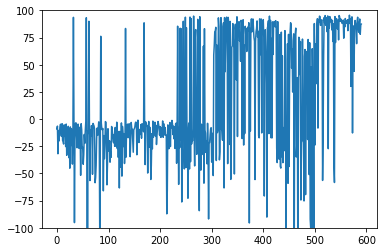

In [46]:
ax = plt.subplot(111)
ax.set_ylim([-100, 100])
ax.plot(hist.history.get('episode_reward'))